In [3]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 模型测试

In [20]:
#观察不同正则化项的区别
data = load_breast_cancer()
X = data.data
y = data.target

In [21]:
X.shape
y.shape

(569,)

In [22]:
l1 = LR(penalty='l1', C=0.5, solver='liblinear', max_iter=1000)
l2 = LR(penalty='l2', C=0.5, solver='liblinear', max_iter=1000)

l1.fit(X, y)
l2.fit(X, y)


LogisticRegression(C=0.5, max_iter=1000, solver='liblinear')

In [23]:
l1.coef_

array([[ 4.00610087,  0.0320813 , -0.1378638 , -0.01623609,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50475949,  0.        , -0.07126699,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24594582, -0.12867061, -0.01439864,  0.        ,
         0.        , -2.03605971,  0.        ,  0.        ,  0.        ]])

In [24]:
l2.coef_

array([[ 1.61520501e+00,  1.03165052e-01,  4.89949805e-02,
        -4.54506240e-03, -9.48008257e-02, -3.01421093e-01,
        -4.56859957e-01, -2.23258616e-01, -1.36553746e-01,
        -1.93906450e-02,  1.51864035e-02,  8.84898752e-01,
         1.16165541e-01, -9.44763174e-02, -9.89655585e-03,
        -2.29726134e-02, -5.65958341e-02, -2.71050955e-02,
        -2.78527986e-02,  3.23035311e-04,  1.25588950e+00,
        -3.02228839e-01, -1.72470649e-01, -2.21057137e-02,
        -1.74443696e-01, -8.78236006e-01, -1.16396034e+00,
        -4.29422377e-01, -4.23200361e-01, -8.69294106e-02]])

In [25]:
#划分训练集和测试集
X_trian, X_test, y_trian, y_test = train_test_split(X, y, test_size=0.3)

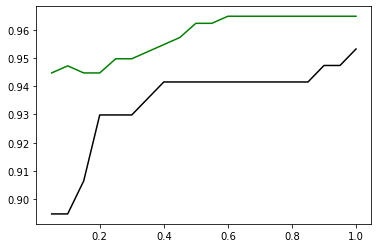

In [28]:
#不同的C值对训练集和测试集精度的影响
l1_trian = []
l2 = []
l1_test = []

for i in np.linspace(0.05, 2, num=20):
	l1 = LR(penalty='l1', C=i, solver='liblinear', max_iter=1000)
	l1.fit(X_trian, y_trian)

	l1_trian.append(accuracy_score(y_true=y_trian, y_pred=l1.predict(X_trian)))
	l1_test.append(accuracy_score(y_true=y_test, y_pred=l1.predict(X_test)))

#画学习曲线
graph = [l1_trian, l1_test]
color = ['green', 'black']
plt.figure()
for i in range(2):
	plt.plot(np.linspace(0.05, 2, num=20), graph[i], color[i])
plt.show()


# 实例：评分卡

In [2]:
from sklearn.linear_model import LogisticRegression as LR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 数据探索和预处理

这一步要了解样本的大概情况，比如查看缺失值，量纲是否同一，是否需要做哑变量

In [62]:
dataset = pd.read_csv('/home/lewin/GitHub项目本地存储库/DRL算法实现/Dataset/Credit/cs-training.csv', sep=',', index_col=0)
dataset.head(20)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [64]:
#去除重复的样本
dataset.drop_duplicates(inplace=True)
dataset.index = range(dataset.shape[0])

In [65]:
dataset

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149386,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149387,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149388,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149389,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [66]:
#缺失值处理
#看一下缺失比例
dataset.isnull().mean(axis=0)

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [67]:
round(dataset.iloc[:, -1].mean())

1

In [68]:
#均值填充numberofDependents
dataset.iloc[:, -1].fillna(round(dataset.iloc[:, -1].mean()), inplace=True)

In [82]:
#采用随机森林来填充缺失值
#可以用其他的没缺失的特征来预测缺失的特征，我觉得这种准确度更高，更有意义
def fillna_rf(X, y, labelToFill):
	'''
	采用随机森林来填补缺失的特征值
	'''
	#将剔除缺失特征列的特征矩阵与标签进行合并,组成新的特征矩阵
	X = X.copy()
	data = pd.concat((X.loc[:, X.columns != labelToFill], pd.DataFrame(y)), axis=1)

	#生成新的训练集和测试集
	na = X.loc[:, labelToFill]
	yTrian  = na[na.notnull()]
	yTest = na[na.isnull()]
	Xtrian = data.iloc[yTrian.index, :]
	Xtest = data.iloc[yTest.index, :]

	# 训练随机森林模型，并预测
	from sklearn.ensemble import RandomForestRegressor as rfr
	rfr = rfr(n_estimators=100)
	rfr = rfr.fit(Xtrian, yTrian)
	Ypredict = rfr.predict(Xtest)

	return Ypredict


In [83]:
#切分标签和索引
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [84]:
naPredict = fillna_rf(X, y, 'MonthlyIncome')

In [88]:
naPredict.shape

(29221,)

In [89]:
#用预测的值来填充缺失的值
X.loc[X.loc[:, 'MonthlyIncome'].isnull(), 'MonthlyIncome'] = naPredict

In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 1   age                                   149391 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 3   DebtRatio                             149391 non-null  float64
 4   MonthlyIncome                         149391 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 6   NumberOfTimes90DaysLate               149391 non-null  int64  
 7   NumberRealEstateLoansOrLines          149391 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 9   NumberOfDependents                    149391 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 11.4 MB


In [93]:
dataset.loc[dataset.loc[:, 'MonthlyIncome'].isnull(), 'MonthlyIncome'] = naPredict

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [111]:
#异常值处理
#描述性分析
dataset.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T


,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149390.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149390.0,6.071121,250.264509,0.0,0.0,0.003199,0.030132,0.154234,0.556491,0.978007,1.093923,50708.0
age,149390.0,52.306587,14.725390,21.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149390.0,0.393882,3.852966,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149390.0,354.439110,2041.850084,0.0,0.0,0.034991,0.177441,0.368233,0.875294,1275.000000,4985.110000,329664.0
MonthlyIncome,149390.0,5428.295974,13239.747118,0.0,0.0,0.190000,1800.000000,4429.000000,7416.000000,10800.000000,23256.110000,3008750.0
NumberOfOpenCreditLinesAndLoans,149390.0,8.480909,5.136528,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149390.0,0.238122,3.826177,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149390.0,1.022384,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149390.0,0.212504,3.810536,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [100]:
#age 0异常
(dataset['age'] <= 0).sum()

1

In [109]:
#只有一个人的年龄为0，去除数据
dataset.drop(dataset[dataset['age'] <= 0].index, inplace=True)

In [112]:
#最大98次逾期,查看对应标签
dataset['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     125453
1      16032
2       4598
3       1754
4        747
5        342
98       220
6        140
7         54
8         25
9         12
96         5
10         4
12         2
11         1
13         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [118]:
dataset[dataset['NumberOfTime30-59DaysPastDueNotWorse'] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1493.319524,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,1973.560000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2359.873095,0,98,0,98,1.0
147180,1,1.0,68,98,255.0,41.110000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,301.950000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


In [120]:
dataset = dataset[dataset['NumberOfTime30-59DaysPastDueNotWorse'] < 90] #删除所有
dataset.index = range(dataset.shape[0])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

In [123]:
#探索标签是否均衡
labelBal = dataset['SeriousDlqin2yrs'].value_counts()

In [138]:
print('标签中{}占比{:.2f}，标签中{}占比{:.2f}'.format(labelBal.index[0], labelBal[0] / dataset.shape[0], 
					          labelBal.index[1], labelBal[1] / dataset.shape[0]))

标签中0占比0.93，标签中1占比0.07


In [143]:
from imblearn.over_sampling import SMOTE

In [144]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [146]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

In [149]:
y.value_counts()

0    139292
1    139292
Name: SeriousDlqin2yrs, dtype: int64

In [150]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [153]:
model_data = pd.concat([y_train, X_train], axis=1)

In [155]:
model_data.index = range(model_data.shape[0]) #划分后索引被打乱，恢复索引

In [157]:
vali_data = pd.concat([y_test, X_test], axis=1)

In [159]:
vali_data.index = range(vali_data.shape[0]) #划分后索引被打乱，恢复索引

In [161]:
#预处理完的数据存储一波
model_data.to_csv('/home/lewin/GitHub项目本地存储库/DRL算法实现/Dataset/Credit/prep-model-data.csv')
vali_data.to_csv('/home/lewin/GitHub项目本地存储库/DRL算法实现/Dataset/Credit/prep-vali-data.csv')

In [4]:
#读取数据
model_data = pd.read_csv('/home/lewin/GitHub项目本地存储库/DRL算法实现/Dataset/Credit/prep-model-data.csv', sep=',')
vali_data = pd.read_csv('/home/lewin/GitHub项目本地存储库/DRL算法实现/Dataset/Credit/prep-vali-data.csv', sep=',')

## 分箱

In [5]:
#按照等频对需要分箱的列进行分箱
model_data['qcut'], updown = pd.qcut(model_data['age'], q = 30, retbins=True)

In [6]:
updown

array([ 21.,  26.,  29.,  31.,  33.,  35.,  36.,  38.,  39.,  41.,  42.,
        43.,  45.,  46.,  47.,  48.,  49.,  51.,  52.,  53.,  54.,  56.,
        58.,  59.,  61.,  63.,  65.,  68.,  71.,  77., 109.])

In [7]:
model_data['qcut'].value_counts() #各个箱子中样本的个数

(49.0, 51.0]      10610
(43.0, 45.0]      10259
(39.0, 41.0]       9599
(54.0, 56.0]       8601
(36.0, 38.0]       8214
(26.0, 29.0]       8095
(56.0, 58.0]       7945
(59.0, 61.0]       7662
(33.0, 35.0]       7402
(31.0, 33.0]       7349
(61.0, 63.0]       7169
(71.0, 77.0]       6787
(29.0, 31.0]       6656
(20.999, 26.0]     6540
(65.0, 68.0]       6523
(77.0, 109.0]      6185
(48.0, 49.0]       5644
(47.0, 48.0]       5605
(45.0, 46.0]       5598
(46.0, 47.0]       5540
(63.0, 65.0]       5368
(51.0, 52.0]       5230
(42.0, 43.0]       4944
(52.0, 53.0]       4857
(68.0, 71.0]       4794
(41.0, 42.0]       4787
(53.0, 54.0]       4755
(38.0, 39.0]       4554
(58.0, 59.0]       3945
(35.0, 36.0]       3791
Name: qcut, dtype: int64

In [10]:
#每个分箱中0和1数据
countBin0 = model_data[model_data['SeriousDlqin2yrs'] == 0].groupby(by='qcut').count()['SeriousDlqin2yrs'] #特征age 各个分箱中0的个数
countBin1 = model_data[model_data['SeriousDlqin2yrs'] == 1].groupby(by='qcut').count()['SeriousDlqin2yrs'] #特征age 各个分箱中1的个数


In [12]:
#做出一个新的表（包括1的个数）
num_bins = [*zip(updown, updown[1:], countBin0, countBin1)]


In [24]:
columns = ['down', 'up', 'count0', 'count1']
df = pd.DataFrame(num_bins, columns=columns)
df['total'] = df['count0'] + df['count1']
df['percentage'] = df['total'] / df['total'].sum()
df['bad_rate'] = df['count1'] / df['total']
df['good%'] = df['count0'] / df['count0'].sum()
df['bad%'] = df['count1'] / df['count1'].sum()
df['woe'] = np.log(df['good%'] / df['bad%'])
df




,down,up,count0,count1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,26.0,2487,4053,6540,0.033537,0.619725,0.025503,0.041573,-0.488667
1,26.0,29.0,2846,5249,8095,0.041511,0.648425,0.029184,0.053841,-0.612410
2,29.0,31.0,2491,4165,6656,0.034132,0.625751,0.025544,0.042722,-0.514319
3,31.0,33.0,2710,4639,7349,0.037686,0.631242,0.027790,0.047584,-0.537837
4,33.0,35.0,2778,4624,7402,0.037957,0.624696,0.028487,0.047431,-0.509816
5,35.0,36.0,1532,2259,3791,0.019440,0.595885,0.015710,0.023172,-0.388635
6,36.0,38.0,3324,4890,8214,0.042121,0.595325,0.034086,0.050159,-0.386311
7,38.0,39.0,1860,2694,4554,0.023353,0.591568,0.019073,0.027634,-0.370738
8,39.0,41.0,3919,5680,9599,0.049224,0.591728,0.040187,0.058262,-0.371402
9,41.0,42.0,1954,2833,4787,0.024548,0.591811,0.020037,0.029059,-0.371745


In [26]:
IV = np.dot((df['good%'] - df['bad%']), df['woe'])
IV

0.35858026883871547

In [28]:
from scipy.stats import chi2_contingency


In [ ]:
#对所有特征进行分箱




In [ ]:
#每个特征对应的箱的woe值


#以上才完成数据预处理


In [ ]:
#测试集映射


In [ ]:
#建立模型

